## Read the dataset csv file

In [2]:
# import necessary libraries


import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string

### Data Analysis :

In [3]:
# read training data from given path


data = pd.read_csv('../../data/train.dat',delimiter='\t')

# add column names

data.columns = ['label','text']



# get look of dataset
data.head()

,label,text
0,5,Renal abscess in children. Three cases of rena...
1,2,Hyperplastic polyps seen at sigmoidoscopy are ...
2,5,Subclavian artery to innominate vein fistula a...
3,4,Effect of local inhibition of gamma-aminobutyr...
4,1,Infection during chronic epidural catheterizat...


In [4]:
# get shape of dataset

print("Number of rows in data :",data.shape[0])

Number of rows in data : 14437


In [5]:
# label info from problem statement

label_info = {1:'digestive system diseases',
2:'cardiovascular diseases' ,
3:'neoplasms',
4:'nervous system diseases',
5:'general pathological conditions'}

In [6]:
# get condition column using label info

data['conditions'] = data.label.apply(lambda x:label_info[x])

In [7]:
# look of dataset

data.head(2)

,label,text,conditions
0,5,Renal abscess in children. Three cases of rena...,general pathological conditions
1,2,Hyperplastic polyps seen at sigmoidoscopy are ...,cardiovascular diseases


In [8]:
#  reveisit the label

data['label'] -= 1

In [9]:
# get valuecounts for conditions

data.conditions.value_counts()

general pathological conditions    4805
digestive system diseases          3163
nervous system diseases            3050
neoplasms                          1925
cardiovascular diseases            1494
Name: conditions, dtype: int64

In [10]:
# create encoding dictionary for class label

id_label = {i:j for i,j in enumerate(data.conditions.unique())}
labei_id = {j:i for i,j in enumerate(data.conditions.unique())}

In [11]:
# label id dictionary

labei_id

{'general pathological conditions': 0,
 'cardiovascular diseases': 1,
 'nervous system diseases': 2,
 'digestive system diseases': 3,
 'neoplasms': 4}

In [12]:
# create function to plot categories

def plot_count(feature,data_frame):

    # plot countplot of body_type and add count on each bar
    plt.figure(figsize=(8,8))
    sns.countplot(y=feature,data=data_frame)
    plt.title(f'Count of categories in {feature}')
    for p in plt.gca().patches:
        plt.gca().annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+p.get_height()/2.), ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    plt.show()

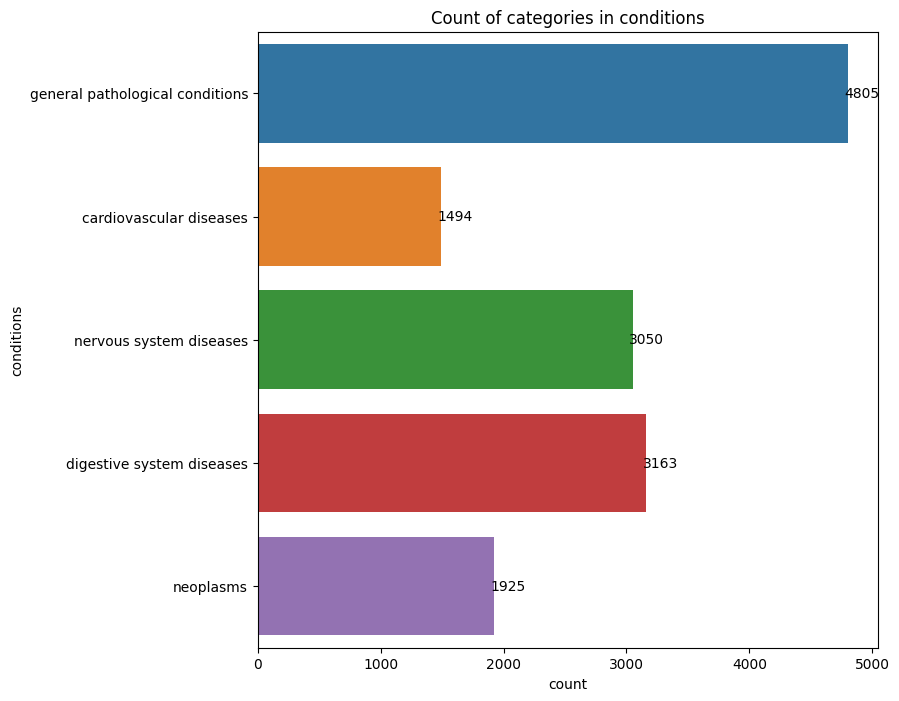

In [13]:
# plot countplot for conditions

plot_count('conditions',data)

In [14]:
# analysis of maximum lenghth of text

data['len_words'] = data['text'].astype(str).apply(lambda x: len(x.split()))

<Axes: xlabel='len_words', ylabel='Count'>

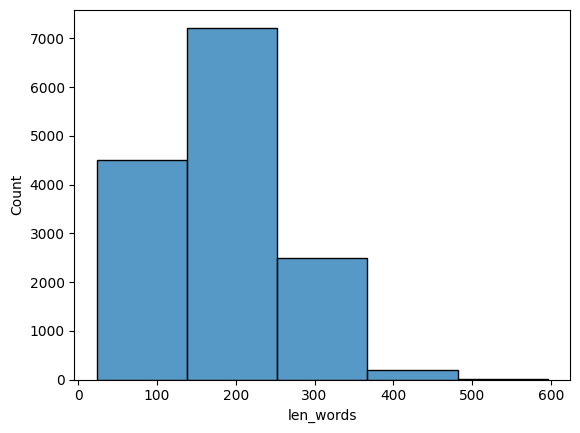

In [15]:
# plot len of text
sns.histplot(data['len_words'], bins=5)

In [16]:
# find the percentile value of len of text

# english
for i in np.arange(0.1,1.1,0.1):
    print('{0} Quantile is {1}'.format(int(i*100),np.quantile(data['len_words'], i)))

10 Quantile is 79.0
20 Quantile is 108.0
30 Quantile is 136.0
40 Quantile is 157.0
50 Quantile is 176.0
60 Quantile is 198.0
70 Quantile is 221.0
80 Quantile is 249.0
90 Quantile is 275.0
100 Quantile is 596.0


In [17]:
# find the percentile value of len of text
# english
for i in np.arange(0.9,1.01,0.01):
    print('{0} Quantile is {1}'.format(int(i*100),np.quantile(data['len_words'], i)))

90 Quantile is 275.0
91 Quantile is 278.0
92 Quantile is 282.0
93 Quantile is 287.0
94 Quantile is 294.0
95 Quantile is 302.0
96 Quantile is 315.0
97 Quantile is 330.0
98 Quantile is 351.28000000000065
99 Quantile is 383.0
100 Quantile is 596.0


### Data Pre-processing :

In [18]:
# create a function for basic pre-processing

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://S+|www.\.\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'xx', '', text)
    text = decontracted(text)
    words = text.split()
#     words = [word for word in words if not word in stopwords]
#     words = [re.sub(r"(.)\1{1,}", r"\1\1", word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text

In [19]:
# check on one text

txt = "marketed a preapproval program on creditkarma to refinance a car at a lower rate, it said i could get preapproved with no affect on my credit, company i was sent to is XXXX didnt like the offers on XX/XX/XXXX so didnt move forward and today XX/XX/XXXX XXXX checked my credit and summitted it to XXXX XXXX XXXX Inquired on XX/XX/XXXX On record until XX/XX/XXXX XXXX XXXX XXXXXXXX XXXX Inquired on XX/XX/XXXX On record until XX/XX/XXXX XXXX XXXX XXXX  Inquired on XX/XX/XXXX On record until XX/XX/XXXX i reached out and was told i gave explict consent and "

preprocess_text(txt)

'marketed preapproval program on creditkarma to refinance car at lower rate it said could get preapproved with no affect on my credit company was sent to is didnt like the offers on so didnt move forward and today checked my credit and summitted it to inquired on on record until inquired on on record until inquired on on record until reached out and was told gave explict consent and'

In [20]:
# apply pre-processing on complaint columns

data["text"] = data["text"].apply(preprocess_text)

In [21]:
data.text.values[2]

'subclavian artery to innominate vein fistula after insertion of hemodialysis catheter insertion of hemodialysis catheters for temporary use is now preferentially performed by percutaneous infraclavicular subclavian vein catheterization this method involves passage of stiff dilator and peelaway sheath over guide wire and is usually carried out without fluoroscopy for the most part this has proved to be valuable and safe approach however small incidence of major complications occurs which needs to be emphasized sixteen cases of arteriovenous fistulas between the subclavian artery or its branches and the subclavian vein have been reported so far in the literature to date only one case of subclavian artery to innominate vein fistula has been reported we report the second case with this complication and suggest possible preventive measures'

In [22]:
data.conditions.values[2]

'general pathological conditions'

### Data Preperation for model:

In [25]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [26]:
# create a preprocess function for creating a data in format

def process_data(row):

    text = row['text']
    text = str(text)
    text = ' '.join(text.split())

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    # label = 0
    # if row['sentiment'] == 'positive':
    #     label += 1

    encodings['label'] = row['label']
    encodings['text'] = text

    return encodings

In [27]:
# check pre process functiom

process_data(data.iloc[0])

{'input_ids': [101, 25125, 14689, 9623, 2015, 1999, 2336, 2093, 3572, 1997, 25125, 14689, 9623, 8583, 1999, 2336, 2024, 2649, 2000, 19141, 1996, 8023, 10886, 2838, 2019, 3176, 23614, 3572, 2988, 2058, 1996, 2627, 2702, 2086, 2020, 8182, 2005, 6612, 2838, 1998, 7242, 9016, 8840, 2378, 3255, 1998, 3393, 6968, 10085, 22123, 12650, 2020, 2691, 10886, 2838, 2021, 2625, 2084, 2431, 1997, 2035, 14689, 9623, 8583, 2020, 3378, 2007, 2593, 2019, 19470, 24471, 13290, 20960, 2030, 3893, 17996, 3226, 1996, 10886, 2838, 2020, 2823, 5457, 2007, 10439, 10497, 28775, 7315, 2566, 9956, 3490, 7315, 2030, 19863, 5244, 13656, 2019, 15923, 2001, 4453, 1999, 3572, 2229, 7474, 11319, 2050, 27441, 1999, 2336, 1998, 2358, 9331, 29598, 24163, 27631, 8740, 23446, 1999, 2336, 1996, 3484, 1997, 27441, 15245, 4158, 1999, 3057, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
# pre process data as per format

from tqdm import tqdm

processed_data = []

for i in tqdm(range(len(data[:100000]))):
    processed_data.append(process_data(data.iloc[i]))

100%|██████████| 14437/14437 [00:34<00:00, 416.96it/s]


In [29]:
processed_data[0]

{'input_ids': [101, 25125, 14689, 9623, 2015, 1999, 2336, 2093, 3572, 1997, 25125, 14689, 9623, 8583, 1999, 2336, 2024, 2649, 2000, 19141, 1996, 8023, 10886, 2838, 2019, 3176, 23614, 3572, 2988, 2058, 1996, 2627, 2702, 2086, 2020, 8182, 2005, 6612, 2838, 1998, 7242, 9016, 8840, 2378, 3255, 1998, 3393, 6968, 10085, 22123, 12650, 2020, 2691, 10886, 2838, 2021, 2625, 2084, 2431, 1997, 2035, 14689, 9623, 8583, 2020, 3378, 2007, 2593, 2019, 19470, 24471, 13290, 20960, 2030, 3893, 17996, 3226, 1996, 10886, 2838, 2020, 2823, 5457, 2007, 10439, 10497, 28775, 7315, 2566, 9956, 3490, 7315, 2030, 19863, 5244, 13656, 2019, 15923, 2001, 4453, 1999, 3572, 2229, 7474, 11319, 2050, 27441, 1999, 2336, 1998, 2358, 9331, 29598, 24163, 27631, 8740, 23446, 1999, 2336, 1996, 3484, 1997, 27441, 15245, 4158, 1999, 3057, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Generate the dataset

In [30]:
# split data into train and test

from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(
    new_df,
    test_size=0.2,
    random_state=2022
)

In [31]:
# get a look for train dataset

train_df.head(2)

,attention_mask,input_ids,label,text,token_type_ids
11094,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2968, 1997, 28667, 29264, 16007, 27881, ...",0,management of recurrent malignant pleural effu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13847,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 11424, 5666, 7088, 2638, 2665, 9614, 199...",1,indocyanine green elimination in patients with...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [32]:
# !pip install datasets

In [33]:
# convert a data into format which is accepted by llm model

import pyarrow as pa
from datasets import Dataset

train_hg = Dataset(pa.Table.from_pandas(train_df))
valid_hg = Dataset(pa.Table.from_pandas(valid_df))

## Create a model

In [34]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [35]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=5
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
# get model architecture

print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [37]:
# !pip install accelerate -U

In [38]:
# !rm -rf /content/result/

In [39]:
from transformers import TrainingArguments, Trainer



training_args = TrainingArguments(output_dir="./result", evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hg,
    eval_dataset=valid_hg,
    tokenizer=tokenizer
)

In [40]:
# !pip install transformers

## Train and Evaluate the model

In [41]:
# train model using training args

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,1.010100,0.921823
2,0.849800,0.881764
3,0.701500,0.915616


TrainOutput(global_step=4332, training_loss=0.8621700917364598, metrics={'train_runtime': 1052.8853, 'train_samples_per_second': 32.907, 'train_steps_per_second': 4.114, 'total_flos': 2279063570487552.0, 'train_loss': 0.8621700917364598, 'epoch': 3.0})

In [42]:
# evaluate the model

trainer.evaluate()

{'eval_loss': 0.9156162142753601,
 'eval_runtime': 22.0381,
 'eval_samples_per_second': 131.046,
 'eval_steps_per_second': 16.381,
 'epoch': 3.0}

## Save the model

In [43]:
# save model

model.save_pretrained('./model/')

## Load the model

In [44]:
from transformers import AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

new_model = AutoModelForSequenceClassification.from_pretrained('./model/').to(device)

In [45]:
from transformers import AutoTokenizer

new_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

## Get predictions

In [46]:
import torch
import numpy as np

def get_prediction(text):
    encoding = new_tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

    outputs = new_model(**encoding)

    logits = outputs.logits
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(logits.squeeze().cpu())
    probs = probs.detach().numpy()
    label = np.argmax(probs, axis=-1)
    return label

In [49]:
row_number = 450
text_pred = data.text[row_number]
label = data.label[row_number]
print("Ground truth : ",label)
print("*"*100)
print("Predicted label : ",get_prediction(text_pred))

Ground truth :  4
****************************************************************************************************
Predicted label :  4


In [52]:
import transformers
import torch

pipeline = transformers.pipeline(
    "sentiment-analysis",
    model = new_model.to(device),
    tokenizer = new_tokenizer,
    max_length = 128,
    device=device,
    function_to_apply='softmax'
)

In [53]:
clinical_text = 'renal abscess in children three cases of renal abscesses in children are described to illustrate the variable presenting features an additional pediatric cases reported over the past ten years were reviewed for clinical features and therapy fever loin pain and leukocytosis were common presenting features but less than half of all abscesses were associated with either an abnormal urinalysis or positive urine culture the presenting features were sometimes confused with appendicitis peritonitis or wilms tumor an organism was identified in casesescherichia coli in children and staphylococcus aureus in children the majority of coli infections occurred in girls and the majority of aureus infections occurred in boys reflux was documented in patients and children had possible extrarenal source of infection antibiotics alone produced cure in children but children required surgical procedure'

pipeline(clinical_text)

[{'label': 'LABEL_4', 'score': 0.681460440158844}]